<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/qo20b88v1hbjztubt06609ovs85q8fau.png" width="400px" align="center"></a>

<h1 align="center"><font size="5">LINEAR REGRESSION WITH TENSORFLOW</font></h1>

# Autor: Mg. Rubén Quispe

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>In this notebook we will overview the implementation of Linear Regression with TensorFlow</strong></font>
<br>
<br>
<h2>Table of Contents</h2>
<ol>
 <li><a href="#ref1">Linear Regression</a></li>
 <li><a href="#ref2">Linear Regression with TensorFlow</a></li>
</ol>
</div>
<br>
<br>
<p></p>
<hr>

<a id="ref1"></a>
<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first import the required packages:

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Let's define the independent variable:

In [17]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

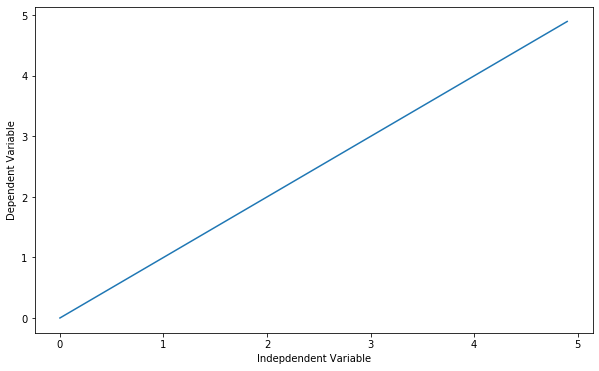

In [18]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

<b><pre>

$$Distance Traveled = Speed \times Time + Initial Distance$$

$$Speed = Acceleration \times Time + Initial Speed$$
</pre></b>

They are also used to describe properties of different materials:

<b><pre>

$$Force = Deformation \times Stiffness$$

$$Heat Transfered = Temperature Difference \times Thermal Conductivity$$

$$Electrical Tension (Voltage) = Electrical Current \times Resistance$$

$$Mass =  Volume \times Density$$
</pre></b>

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

<hr>

<a id="ref2"></a>
<h1>Linear Regression with TensorFlow</h1>
A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

Para la primera parte usaremos un conjunto de datos de muestra, y luego usaremos TensorFlow para ajustar y obtener los parámetros correctos. Descargamos un conjunto de datos que está relacionado con el consumo de combustible y la emisión de dióxido de carbono de los automóviles.


In [19]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-05 19:27:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  237K 0s
    50K .......... ..........                                 100% 6.33M=0.2s

2020-04-05 19:27:50 (331 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



[descarga wget](https://eternallybored.org/misc/wget/)

<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [20]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Digamos que queremos usar la regresión lineal para predecir la emisión de CO2 de los automóviles en función del tamaño de su motor. Entonces, definamos el valor X e Y para la regresión lineal, es decir, train_x y train_y:

In [21]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:

In [22]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

Ahora, vamos a definir una función de pérdida para nuestra regresión, para que podamos entrenar nuestro modelo para que se ajuste mejor a nuestros datos. En una regresión lineal, minimizamos el error al cuadrado de la diferencia entre los valores pronosticados (obtenidos de la ecuación) y los valores objetivo (los datos que tenemos). En otras palabras, queremos minimizar el cuadrado de los valores pronosticados menos el valor objetivo. Entonces definimos la ecuación para minimizarla como pérdida.

Para encontrar el valor de nuestra pérdida, usamos tf.reduce_mean (). Esta función encuentra la media de un tensor multidimensional, y el resultado puede tener una dimensión diferente.

In [23]:
loss = tf.reduce_mean(tf.square(y - train_y))

Luego, definimos el método optimizador. El gradiente Descent optimizer toma en parámetro: velocidad de aprendizaje, que corresponde a la velocidad con la que el optimizador debe aprender; existen ventajas y desventajas para aumentar el parámetro de velocidad de aprendizaje, con una alta tasa de aprendizaje, el modelo de capacitación converge rápidamente, pero existe el riesgo de que una alta tasa de aprendizaje provoque inestabilidad y el modelo no converja. No dude en realizar cambios en el parámetro de aprendizaje y verificar su efecto. Por otro lado, disminuir la tasa de aprendizaje podría reducir la velocidad de convergencia, pero aumentaría la posibilidad de converger en una solución. Debe tener en cuenta que la solución podría no ser una solución óptima global, ya que existe la posibilidad de que el optimizador se quede atascado en una solución óptima local. Revise otro material para obtener más información sobre la optimización. Aquí usaremos un descenso de gradiente simple con una tasa de aprendizaje de 0.05:

In [24]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

Ahora definiremos el método de entrenamiento de nuestro gráfico, ¿qué método usaremos para minimizar la pérdida? Usaremos .minimize (), lo que minimizará la función de error de nuestro optimizador, lo que dará como resultado un mejor modelo.

In [26]:
train = optimizer.minimize(loss)

Don't forget to initialize the variables before executing a graph:

In [27]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:

In [28]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.574 77.07105 46.110275
5 1891.72 58.84462 47.59573
10 1762.7239 57.65104 53.019833
15 1653.5896 56.366524 58.02392
20 1559.044 55.172848 62.682037
25 1477.1368 54.061794 67.01765
30 1406.1786 53.02767 71.053085
35 1344.7063 52.065136 74.80913
40 1291.4506 51.169247 78.305115
45 1245.3143 50.335384 81.559074
50 1205.3452 49.55925 84.587746
55 1170.7188 48.836853 87.40673
60 1140.7216 48.16447 90.03054
65 1114.7341 47.53864 92.472694
70 1092.2201 46.956135 94.74576
75 1072.7157 46.413963 96.86146
80 1055.8191 45.90933 98.83067
85 1041.1809 45.43963 100.66356
90 1028.4994 45.002457 102.36954
95 1017.51324 44.595547 103.9574


Lets plot the loss values to see how it has changed during the training:

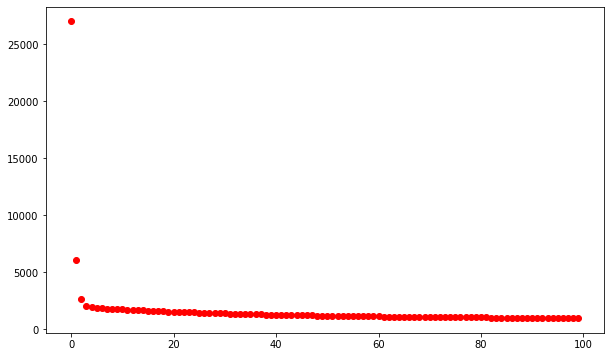

In [29]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

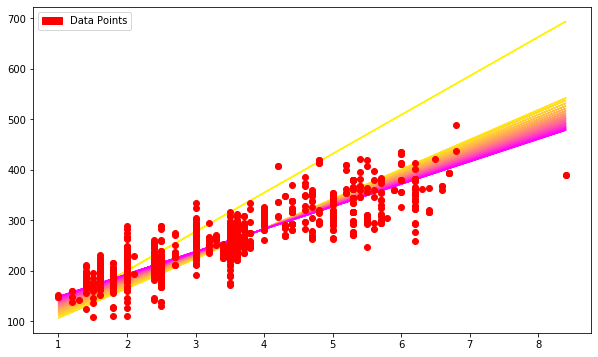

In [32]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---------------

## Want to learn more?

Running deep learning programs usually needs a high performance platform. __PowerAI__ speeds up deep learning and AI. Built on IBM’s Power Systems, __PowerAI__ is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The __PowerAI__ platform supports popular machine learning libraries and dependencies including TensorFlow, Caffe, Torch, and Theano. You can use [PowerAI on IMB Cloud](https://cocl.us/ML0120EN_PAI).

Also, you can use __Watson Studio__ to run these notebooks faster with bigger datasets.__Watson Studio__ is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, __Watson Studio__ enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of __Watson Studio__ users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this lesson!

If you are familiar with some of these methods and concepts, this tutorial might have been boring for you, but it is important to get used to the TensorFlow mechanics, and feel familiar and comfortable using it, so you can build more complex algorithms in it.

Created by <a href="https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a> , <a href="https://ca.linkedin.com/in/rafaelblsilva"> Rafael Belo Da Silva</a><br>

This tutorial was inspired by the documentation of TensorFlow : https://www.tensorflow.org/versions/r0.9/get_started/index.html <br>

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).